In [83]:
%matplotlib widget

In [84]:
"""Define a class for the intertemporal utility function to include default parameters
and the ability to compute single or multiple values for felicity, lifetime utility, 
period 2 consumption satisfying the budget constraint, etc.
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patheffects import withStroke
plt.rcParams.update({'figure.max_open_warning': 0})
from ipywidgets import interact
from ipywidgets import Layout
#import ipywidgets as widgets

from matplotlib import rcParams
rcParams.update({'font.size': 16})

#from IPython.display import HTML

class IntertemporalChoice:
    def __init__(self, par_dict=None):
        if par_dict is None:
            par_dict = {'beta': 0.8, 'R': 1.2, 'eta':1.8, 'y1': 4.0, 'y2':4.0}
        self.pars = par_dict
        
    def felicity(self, c):
        """Return felicity given c and parameters"""
        eta = self.pars.get('eta')
        if eta == 1:
            return np.log(c)
        else:
            u = (np.power(c, 1-eta) - 1) / (1 - eta)
            return u
            
    def utility(self, c1, c2):
        """Return utility given c1 and c2 and parameters"""
        beta = self.pars.get('beta')
        return self.felicity(c1) + beta * self.felicity(c2)

    def budget_constraint(self, c1):
        """Given c1, return c2 consistent with intertemporal budget constraint"""
        R = self.pars.get('R')
        y1 = self.pars.get('y1')
        y2 = self.pars.get('y2')
        return R * (y1 - c1) + y2

    def c2(self, c1):
        """Given c1, return c2 consistent with first order condition"""
        eta = self.pars.get('eta')
        beta = self.pars.get('beta')
        R = self.pars.get('R')
        ratio = np.power((beta * R), 1.0/eta)
        return c1 * ratio
        

    # Compute coordinates and utility at tangent. Be careful to use the same values as in the 
    # other functions if overriding any defaults.
    def tangent_point(self):
        R = self.pars.get('R')
        y1 = self.pars.get('y1')
        y2 = self.pars.get('y2')
        beta = self.pars.get('beta')
        eta = self.pars.get('eta')
        
        ratio = (beta * R)**(1.0/eta)
        lifeinc = y2 + R * y1
        c1 = lifeinc / (ratio + R)
        c2 = self.budget_constraint(c1)
        u = self.utility(c1, c2)
        return (c1, c2, u)

    """These functions are useful for plotting against a linspace of c1 (budget, first order) 
    or a meshgrid of c1 and c2 (utility)"""
    def linspace(self):
        return np.linspace(0.5, 10, 100)

    def budget_line(self):
        return self.budget_constraint(self.linspace())

    def c2_line(self):
        return self.c2(self.linspace())

    def gridded_utility(self):
        c1, c2 = np.meshgrid(self.linspace(), self.linspace())
        return self.utility(c1, c2)



<span style="font-size:1.25em;">
    
# Intertemporal Choice

 </span>

<span style="font-size:1.25em;">

## Intertemporal choice

- Consumption decisions take place in time
- Not just *what* to consume (intra-temporal choice) but *when*
- Making this choice requires technology for saving and/or borrowing, e.g.
    - Storing grain
    - Money
    - Financial assets
    - Productive assets
    - Informal credit (from friends, family)
    - Bank credit

 </span>

<span style="font-size:1.25em;">

## Classical economics

Adam Smith ("An Inquiry into the Nature and Causes of the Wealth of Nations" 1776) focussed on the accumulation of capital through saving-cum-investment, but did not explain *why* people saved/invested.

John Rae ("The Sociological Theory of Capital" 1834) posits conflicting psychological motives explain the "effective desire of accumulation": 
- prudential/self-restraint
- bequest motive
- urge to satisfy immediate desires
- risk of death from disease, violence

 </span>

<span style="font-size:1.25em;">
    
## Development of the standard theory

- Eugen von B&ouml;hm-Bawerk's 1889 conceived the interest rate as a price and a means of allocating goods over time. 
- Irving Fisher's *Theory of Interest* (1930): the two-good indifference diagram
- Paul Samuelson (1937): the formal mathematical discounted utility model 

</span>

<span style="font-size:1.25em;">

 ## Fisher's two-period model

- The consumer has some felicity (instantaneous utility) function $u(c_t)$
- Overall utility is $ \,U(c_1,c_2) = u(c_1) + \beta\, u(c_2) $. 
- $ 0 < \beta < 1$ is the *discount factor*.
- Intertemporal budget constraint $ c_1 + c_2/R \le y_1 + y_2 /R $ 
- $ R \equiv 1 + r $ is the interest factor.
- The problem is to choose consumption $c_1$, $c_2$ given preferences, $R$ and income $y_1$, $y_2$. 

</span>

<span style="font-size:1.25em;">

 ## Budget constraint

How did we get the budget constraint $ c_1 + c_2/R \le y_1 + y_2 /R $?

- Constraint for period 1: $ c_1 + a_1 \le y_1 $
- Constraint for period 2: $ c_2 \le y_2 + R a_1 $ where $R$ is the interest factor on period 1 savings $a_1$. 
- Period 2 constraint $\implies  c_2 / R - y_2 / R \le  a_1 $
- Eliminating $a_1$ in period 1  $\implies c_1 + c_2 / R \le y_1 + y_2 / R$

N.B. if our economy has only two periods&mdash; or we only care about two periods &mdash;we have no motivation to save in period 2. Then, with non-statiation in consumption, we will exhaust our income over the two periods.  

</span>

interactive(children=(FloatSlider(value=1.5, description='R', max=1.8, min=1.0, step=0.05), Output()), _dom_cl…

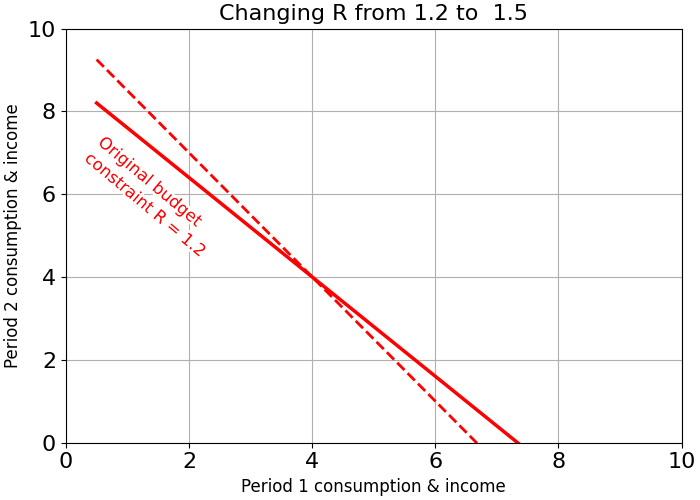

In [91]:
"""Show how the interest factor affect the budget line"""

choice0 = IntertemporalChoice()

# Create a contour plot to visualize the indifference curve
plt.figure(figsize=(7, 5), layout='constrained')

# Plot the budget constraint
plt.plot(choice0.linspace(), choice0.budget_line(), color='red', linewidth =2.5)

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel('Period 1 consumption & income', fontsize=12)
plt.ylabel('Period 2 consumption & income', fontsize=12)
plt.title(r"Effects of $\beta$ and R", fontsize=12)

budget_line1, = plt.plot(choice0.linspace(), choice0.budget_line(), color='red', 
                         linewidth =2, linestyle='--')

plt.annotate('Original budget\nconstraint R = 1.2', xy=(5, 3), xytext=(0.25, 4.5),
               fontsize=12, rotation=-40, color='red',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.grid(True)

def update(R = 1.5):
    choice0.pars['R'] = R

    budget_line1.set_ydata(choice0.budget_line())
    plt.title(r"Changing R from 1.2 to  {}".format(np.round(R,2)), 
              fontsize=16)
    #fig.canvas.layout = Layout(align_items='center', width='50%') 
    #This is not right and pertains only to the widget, not the whole figure?
    plt.gcf().canvas.draw_idle()
    
interact(update, R = (1.0,1.8,0.05));



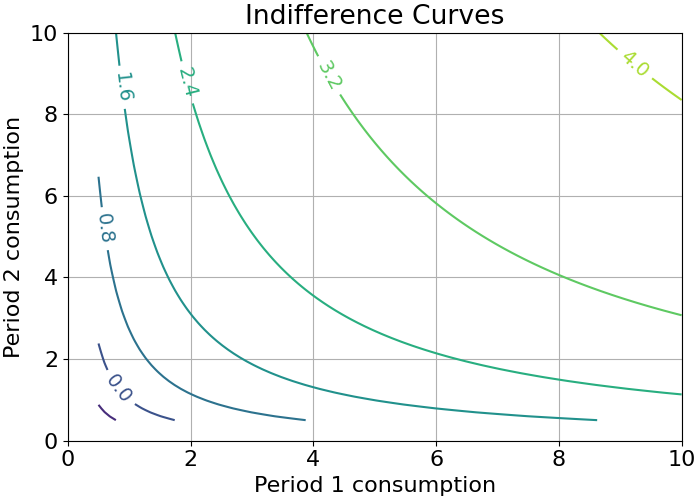

In [86]:
"""Show indifference curves """

choice0 = IntertemporalChoice()
choice0.pars['eta'] = 1.0

# Calculate utility for each combination of goods 1 and 2
utility_values = choice0.gridded_utility()

# Create a contour plot to visualize the indifference curve
plt.figure(figsize=(7, 5), layout='constrained')

contour = plt.contour(choice0.linspace(), choice0.linspace(), choice0.gridded_utility(), levels=7)

plt.xlim(0, 10)
plt.ylim(0, 10)
plt.clabel(contour, inline=True, fontsize=14)
plt.xlabel('Period 1 consumption')
plt.ylabel('Period 2 consumption')
plt.title("Indifference Curves")
plt.grid(True)

fig = contour.axes.figure
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
#fig.canvas.resizable = False



<span style="font-size:1.25em;">
    
## Two-good model

Using the method of Lagrange multipliers, solve the constrained maximisation 
$$ \mathcal{L} = \max_{c_1,c_2} \,u( c_1 ) + \beta u ( c_2) + \lambda \left( 
 y_1 + y_2 /R - c_1 - c_2/R  \right) $$

The first order conditions are 
$$ \frac{\partial \mathcal{L}}{\partial c_1} = u^\prime(c_1) - \lambda = 0 \quad 
\text{and} \quad \frac{\partial \mathcal{L}}{\partial c_1} = \beta u^\prime(c_2) - \frac{\lambda}{R} = 0 $$ 

Eliminating $\lambda$ we get the Euler equation
$$ \frac{u^\prime(c_1)}{u^\prime(c_2)} = \beta R $$

</span>

<span style="font-size:1.25em;">

## Constant relative risk aversion (CRRA) utility

$$ u(c_t) \equiv \frac{ c_t^{1-\eta} -1}{1 - \eta} $$ 

The first order conditions are 
$$ \frac{\partial \mathcal{L}}{\partial c_1} = c_1^{-\eta} - \lambda = 0 \quad 
\text{and} \quad \frac{\partial \mathcal{L}}{\partial c_1} = \beta \,c_2^{-\eta} - \frac{\lambda}{R} = 0 $$ 

Eliminating $\lambda$ we get the Euler equation

$$ \frac{c_2}{c_1} = \left(\beta R\right)^{1/\eta} $$

Logarithmic utility is a special case of CRRA with $\eta = 1$. 

</span>


<span style="font-size:1.25em;">

## Interpretating the Euler equation

To compute the  marginal rate of substition (MRS), totally differentiate the utility function: 

$$ dU = 0 = u^\prime(c_1) \, dc_1 + \beta \,u^\prime(c_2) \, dc_2$$

$$ MRS \equiv -  \frac{ dc_2}{dc_1 } = \frac {u^\prime(c_1)}{ \beta \,u^\prime(c_2) } $$

To compute the marginal rate of transformation (MRT), totally differentiate the budget constraint:

$$ MRT = - \frac{dc_2}{dc_1} = R   $$

So the Euler equation tells us that for optimality, MRS = MRT :

$$ \frac{u^\prime(c_1)}{\beta \,u^\prime(c_2)} =  R $$

</span>


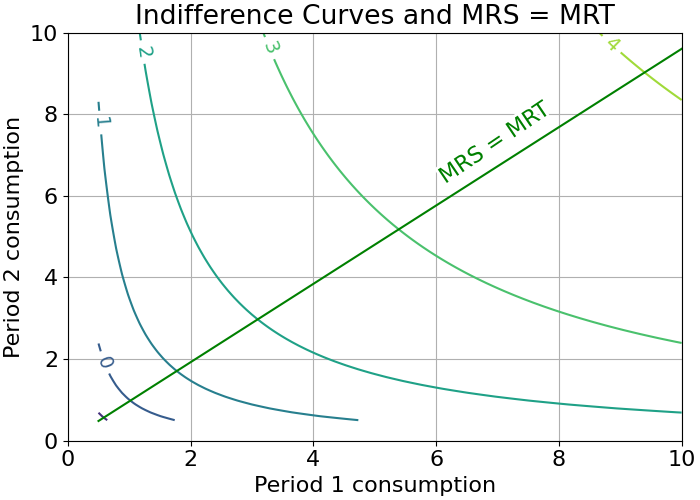

In [87]:
"""Show indifference curves """

choice0 = IntertemporalChoice()
choice0.pars['eta'] = 1.0

# Calculate utility for each combination of goods 1 and 2
utility_values = choice0.gridded_utility()

# Create a contour plot to visualize the indifference curve
fig, ax = plt.subplots(figsize=(7, 5), layout='constrained')

contour = ax.contour(choice0.linspace(), choice0.linspace(), choice0.gridded_utility(), levels=5)
ax.plot(choice0.linspace(), choice0.c2_line(), color='green')


ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.clabel(contour, inline=True, fontsize=14)
ax.set_xlabel('Period 1 consumption')
ax.set_ylabel('Period 2 consumption')
ax.set_title("Indifference Curves and MRS = MRT")
ax.grid(True)

ax.annotate('MRS = MRT', xy=(5, 3), xytext=(6, 6.3),
               fontsize=16, rotation=34, color='green',
            path_effects=[withStroke(linewidth=4, foreground='white')])

fig = contour.axes.figure
fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False
#fig.canvas.resizable = False


<span style="font-size:1.25em;">

## CRA and IES with CRRA utility

Coefficient of risk aversion (CRA)

$$ CRA \equiv-c_t \frac{U^{\prime\prime}(c_t)}{U^{\prime}(c_t) }  = \eta \,c_t  \, \frac{c_t^{-\eta-1}}{c_t^{-\eta} }  = \eta$$

Intertemporal elasticity of substitution (IES)

$$ IES \equiv - \frac{ d \ln \left( \frac{c_{t+1}}{c_t} \right) }
{  d \ln \left( \frac{U^{\prime}(c_{t+1})}{U^{\prime}(c_{t}) }   \right)   }  
=  \frac{1}{\eta}
$$


</span>


<span style="font-size:1.25em;">

## Constrained optimum

The constrained optimum consumption $(c_1^*,c_2^*)$ is found as the intersection of the budget constraint and the first order condition. 

</span>


<span style="font-size:1.25em;">

High CRA / low inverse IES makes consumption more sensitive to $\beta R$. 

</span>

interactive(children=(FloatSlider(value=1.5, description='R', max=1.8, min=1.0, step=0.05), FloatSlider(value=…

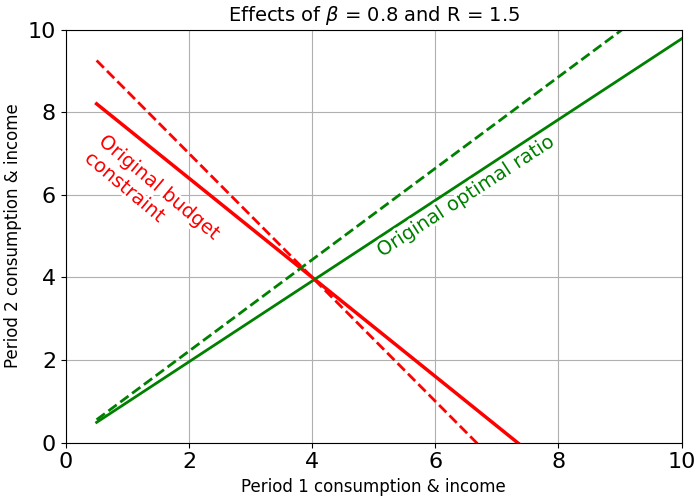

In [94]:
"""Show how the discount and interest factors affect the budget line and first order condition"""

choice0 = IntertemporalChoice()

pars1 = choice0.pars.copy()
pars1['beta'] = 1.05 
choice1 = IntertemporalChoice(pars1)


# Create a contour plot to visualize the indifference curve
plt.figure(figsize=(7, 5), layout='constrained')

# Plot the budget constraint
plt.plot(choice0.linspace(), choice0.budget_line(), color='red', linewidth =2.5)

plt.xlim(0, 10)
plt.ylim(0, 10)

plt.xlabel('Period 1 consumption & income', fontsize=12)
plt.ylabel('Period 2 consumption & income', fontsize=12)
plt.title(r"Effects of $\beta$ and R", fontsize=12)

plt.plot(choice0.linspace(), choice0.c2_line(), color='green', linewidth =2, linestyle='-')
c2_line1, = plt.plot(choice1.linspace(), choice1.c2_line(), color='green', linewidth =2, 
                     linestyle='--')
budget_line1, = plt.plot(choice1.linspace(), choice1.budget_line(), color='red', 
                         linewidth =2, linestyle='--')

plt.annotate(r'Original optimal ratio', xy=(5, 6), xytext=(5.0, 4.5),
               fontsize=14, rotation=33, color='green',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.annotate('Original budget\nconstraint', xy=(5, 3), xytext=(0.25, 4.5),
               fontsize=14, rotation=-40, color='red',
            path_effects=[withStroke(linewidth=4, foreground='white')])

plt.grid(True)

def update(R = 1.5, beta = 0.8):
    choice1.pars['beta'] = beta
    choice1.pars['R'] = R

    c2_line1.set_ydata(choice1.c2_line())
    budget_line1.set_ydata(choice1.budget_line())
    plt.title(r"Effects of $\beta$ = {} and R = {}".format(np.round(beta,2), np.round(R,2)), 
              fontsize=14)
    #fig.canvas.layout = Layout(align_items='center', width='50%') 
    #This is not right and pertains only to the widget, not the whole figure?
    plt.gcf().canvas.draw_idle()
    
interact(update, beta = (0.7,1.0,0.05), R = (1.0,1.8,0.05));



interactive(children=(FloatSlider(value=1.5, description='R', max=1.8, min=1.0), Output()), _dom_classes=('wid…

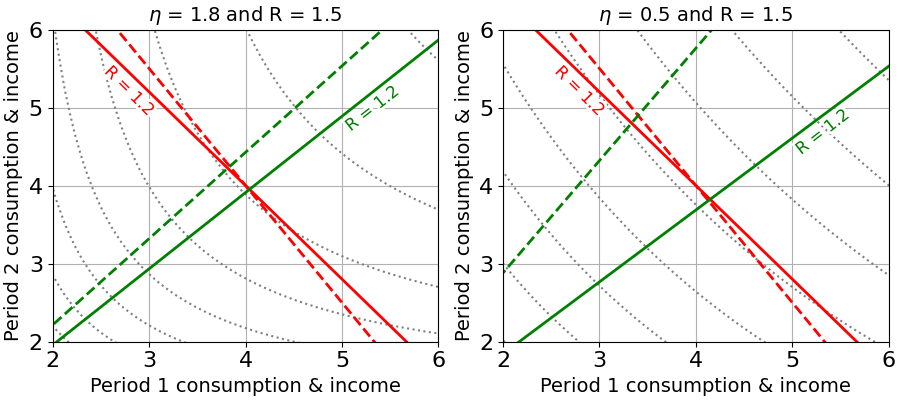

In [89]:
"""Show how the coefficient of risk aversion (or the inverse IES) affects the budget line and first order condition, hence optimum consumption"""

choice0 = IntertemporalChoice()

parse = choice0.pars.copy()
parse['eta'] = 0.5 
choicee = IntertemporalChoice(parse)

# Calculate utility for each combination of goods 1 and 2
utility_values = choice0.gridded_utility()
utility_valuese = choicee.gridded_utility()

# Create a contour plot to visualize the indifference curve
fig, ax = plt.subplots(1,2, figsize=(9.0, 4.0), layout='constrained')

contour = ax[0].contour(choice0.linspace(), choice0.linspace(), choice0.gridded_utility(), 
                        levels=40, colors='grey', linestyles=':')
contoure = ax[1].contour(choicee.linspace(), choice0.linspace(), choicee.gridded_utility(), 
                         levels=20, colors='grey', linestyles=':')

ax[0].set_xlim(2, 6)
ax[0].set_ylim(2, 6)
ax[1].set_xlim(2, 6)
ax[1].set_ylim(2, 6)

ax[0].set_xlabel('Period 1 consumption & income', fontsize=14)
ax[0].set_ylabel('Period 2 consumption & income', fontsize=14)
ax[1].set_xlabel('Period 1 consumption & income', fontsize=14)
ax[1].set_ylabel('Period 2 consumption & income', fontsize=14)

# Plot the budget constraint
ax[0].plot(choice0.linspace(), choice0.budget_line(), color='red', linewidth =2)
ax[1].plot(choicee.linspace(), choicee.budget_line(), color='red', linewidth =2)

b_line_1, = ax[0].plot(choice0.linspace(), choice0.budget_line(), color='red', linewidth =2, linestyle='--')
b_line_e1, = ax[1].plot(choicee.linspace(), choicee.budget_line(), color='red', linewidth =2, linestyle='--')

ax[0].plot(choice0.linspace(), choice0.c2_line(), color='green', linewidth =2, linestyle='-')
ax[1].plot(choicee.linspace(), choicee.c2_line(), color='green', linewidth =2, linestyle='-')

c2_line_1, = ax[0].plot(choice0.linspace(), choice0.c2_line(), color='green', linewidth =2, linestyle='--')
c2_line_e1, = ax[1].plot(choicee.linspace(), choicee.c2_line(), color='green', linewidth =2, linestyle='--')

ax[0].annotate(r'R = 1.2', xy=(5, 6), xytext=(5.0, 4.7),
               fontsize=12, rotation=38, color='green',
            path_effects=[withStroke(linewidth=4, foreground='white')])

ax[0].annotate(r'R = 1.2', xy=(5, 6), xytext=(2.5, 4.9),
               fontsize=12, rotation=-45, color='red',
            path_effects=[withStroke(linewidth=4, foreground='white')])

ax[1].annotate(r'R = 1.2', xy=(5, 6), xytext=(5.0, 4.4),
               fontsize=12, rotation=38, color='green',
            path_effects=[withStroke(linewidth=4, foreground='white')])

ax[1].annotate(r'R = 1.2', xy=(5, 6), xytext=(2.5, 4.9),
               fontsize=12, rotation=-45, color='red',
            path_effects=[withStroke(linewidth=4, foreground='white')])

ax[0].grid(True)
ax[1].grid(True)

fig.canvas.toolbar_visible = False
fig.canvas.header_visible = False
fig.canvas.footer_visible = False

def update(R = 1.5):
    choice0.pars['R'] = R
    choicee.pars['R'] = R
    
    b_line_1.set_ydata(choice0.budget_line())
    c2_line_1.set_ydata(choice0.c2_line())
    
    b_line_e1.set_ydata(choicee.budget_line())
    c2_line_e1.set_ydata(choicee.c2_line())
    
    ax[0].set_title(r'$\eta$ = 1.8 and R = {}'.format(R), fontsize=14)
    ax[1].set_title(r'$\eta$ = 0.5 and R = {}'.format(R), fontsize=14)

    fig.canvas.draw_idle()
    
interact(update, R = (1.0,1.8), continuous_update=False);




<span style="font-size:1.25em;">
    
## Discounted utility model

- Usually attributed to Samuelson (1937), but note his analysis is in continuous time
- Felicities $u_t(\cdot)$ are additively time-separable
- Exponential discounting, i.e. weight felicities $s$ periods ahead by $D_s \equiv \beta^s, \quad 0 < \beta < 1$

$$ U_t \equiv \displaystyle \max_{\:\displaystyle \{c_s\}_t^\infty}  \sum_{s=t}^\infty \beta^s u(c_s)
$$

</span>

<span style="font-size:1.25em;">
    
## Microeconomic evidence *against* exponential discounting

- Impatience: $\beta$ appears lower for near-term than for long-term choices
- Committment: many people value being committed to save (e.g. superannuation contributions, mortgage payments)
- Time inconsistency: people change their plans despite their circumstances remaining the same

Alternatives such as *quasi-hyperbolic discounting* can account for this behaviour

$$ U_t \equiv \displaystyle \max_{\:\displaystyle \{c_s\}_t^\infty} c_t + \zeta \sum_{s=t+1}^\infty \beta^s u(c_s)
\quad 0 < \zeta < 1$$
</span>

<span style="font-size:1.25em;">
    
## Intertemporal choice in macro models

- Behavioural economics insights are increasingly incorporated into macro models (Driscoll & Holden, 2014)
- Recognised problems applying the Euler equation to aggregate consumption:
    - Excess smoothness: esponses to news of future events are too weak
    - Excess sensitivity: responses to fluctuations in current income are too strong   
- Different theories can explain the same empirical regularities and discriminating between them can be hard e.g.
    - Internal habit in consumption (non-time-separable preferences)
    - External habit in consumption ("keeping up with the Joneses")
    - Rule-of-thumb consumers
- Modellers' choices often influenced by analytically or computationally tractability
  

</span>

<span style="font-size:1.25em;">
    
## Consumption habit

- Internal consumption habit
- Individual utility becomes non-time-separable
  
$$ U_t \equiv \displaystyle \max_{\:\displaystyle \{c_s\}_t^\infty}  \sum_{s=t}^\infty \beta^s u(c_s - \theta\, c_{s-1})
\quad 0 < \beta < 1$$

- External consumption habit&mdash;"keeping up with the Joneses"
- Individual utility remains time-separable
- Individual choices are socially sub-optimal in a laissez-faire economy
$$ U_t \equiv \displaystyle \max_{\:\displaystyle \{c_s\}_t^\infty}  \sum_{s=t}^\infty \beta^s u(c_s - \theta\, \bar{c}_{s-1})
\quad 0 < \beta < 1$$

</span>